# Processing bulk RNAseq data 

Data from: "A gut microbial metabolite of dietary polyphenols reverses obesity-driven hepatic steatosis" Osborn et al. 2022
https://doi.org/10.1073/pnas.2202934119

## Overview of Study

This study looked at whether a single microbial flavonoid catabolite (4-HPAA) could reverse Hepatic Steatosis (fatty liver disease) in mice.

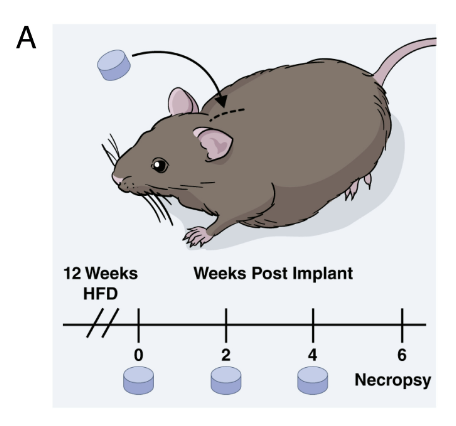

To do this, the researchers fed mice a high fat diet for 12 weeks. The mice were then divided into two groups: the mice in the test group received a subcutaneous implant of 4-HPAA while the mice in the control group received a subcutaneous sham scaffold implant (placebo) for six weeks. 

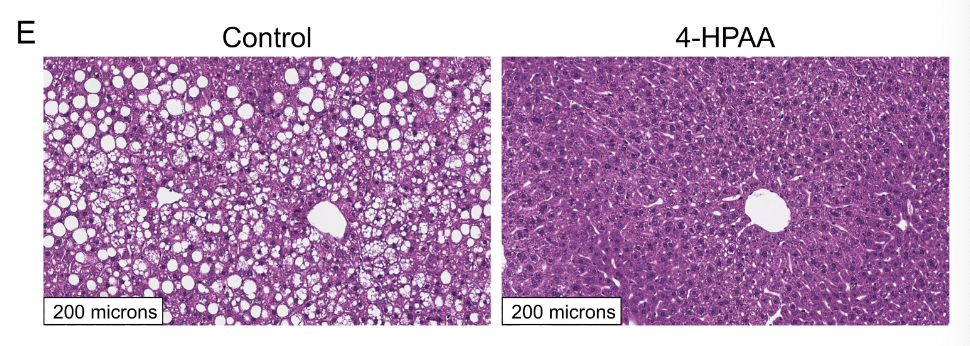

They found that 4-HPAA supplementation was able to reverse hepatic steatosis; the images above are H&E-stained sections of control and 4-HPAA mice livers that show the physical changes in 4-HPAA-treated mice. 

They performed bulk RNA sequencing on the livers of mice from both groups, and found a total of 304 significantly differentially expressed genes. They concluded from this that 4-HPAA treatment may reduce hepatic steatosis in part through transcriptional remodeling within the liver. 
I will be recreating this analysis and comparing my results with those from the paper. Below is a heatmap and a volcano plot from the paper of some of the DEGs found. From the volcano plot, I can see there there are only a handful of genes that have a significant p-value and fold change. The paper states that many DEGs are implicated in hepatic lipid metabolism, so I will see if this is also what I find when doing the functional analysis. 

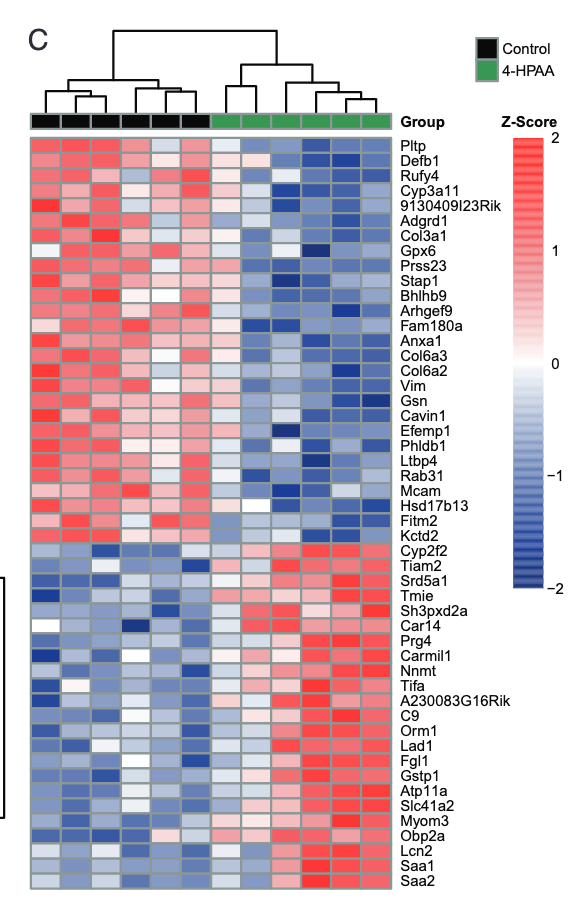

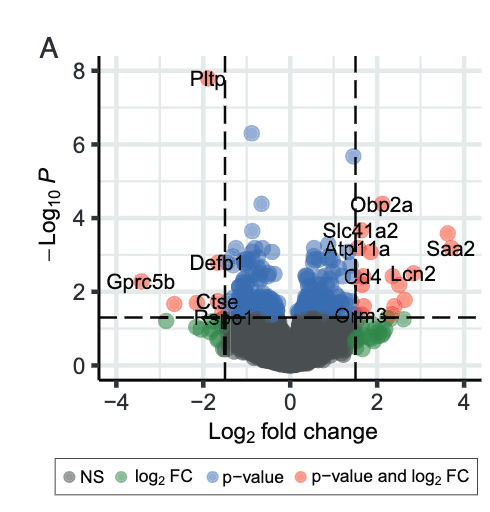

## Download fastq files

Create directory to work in:

In [3]:
mkdir -p /mnt/storage/r0877717/jupyternotebooks/Task_1
cd /mnt/storage/r0877717/jupyternotebooks/Task_1

Download files from SRA:

In [82]:
vdb-config -s /repository/user/cache-disabled=true #prevents unecessary files to be saved to home folder

In [83]:
fastq-dump --split-files SRR16958763 #Control rep1

Read 19387754 spots for SRR16958763
Written 19387754 spots for SRR16958763


In [84]:
fastq-dump --split-files SRR16958764 #Control rep2

Read 16075500 spots for SRR16958764
Written 16075500 spots for SRR16958764


In [85]:
fastq-dump --split-files SRR16958769 #4-HPPA rep1

Read 18570766 spots for SRR16958769
Written 18570766 spots for SRR16958769


In [86]:
fastq-dump --split-files SRR16958770 #4-HPPA rep2

Read 16805596 spots for SRR16958770
Written 16805596 spots for SRR16958770


QC by checking number of reads downloaded:

The number of lines /4 should be the same as the # of spots in the SRA database.

In [117]:
wc -l SRR16958763_1.fastq

77551016 SRR16958763_1.fastq


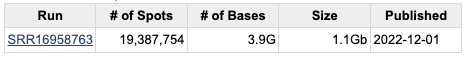

In [118]:
wc -l SRR16958764_1.fastq

64302000 SRR16958764_1.fastq


In [119]:
wc -l SRR16958769_1.fastq

74283064 SRR16958769_1.fastq


In [120]:
wc -l SRR16958770_1.fastq

67222384 SRR16958770_1.fastq


The files look good -- number of reads for each matches what is expected.

## Quality control using FASTQC

I ran fastqc on all fastq files (my data has paired-ends reads; I looked at the forward reads for all 4 samples)

In [14]:
/usr/bin/fastqc -o . SRR16958763_1.fastq

Started analysis of SRR16958763_1.fastq
Approx 5% complete for SRR16958763_1.fastq
Approx 10% complete for SRR16958763_1.fastq
Approx 15% complete for SRR16958763_1.fastq
Approx 20% complete for SRR16958763_1.fastq
Approx 25% complete for SRR16958763_1.fastq
Approx 30% complete for SRR16958763_1.fastq
Approx 35% complete for SRR16958763_1.fastq
Approx 40% complete for SRR16958763_1.fastq
Approx 45% complete for SRR16958763_1.fastq
Approx 50% complete for SRR16958763_1.fastq
Approx 55% complete for SRR16958763_1.fastq
Approx 60% complete for SRR16958763_1.fastq
Approx 65% complete for SRR16958763_1.fastq
Approx 70% complete for SRR16958763_1.fastq
Approx 75% complete for SRR16958763_1.fastq
Approx 80% complete for SRR16958763_1.fastq
Approx 85% complete for SRR16958763_1.fastq
Approx 90% complete for SRR16958763_1.fastq
Approx 95% complete for SRR16958763_1.fastq
Analysis complete for SRR16958763_1.fastq


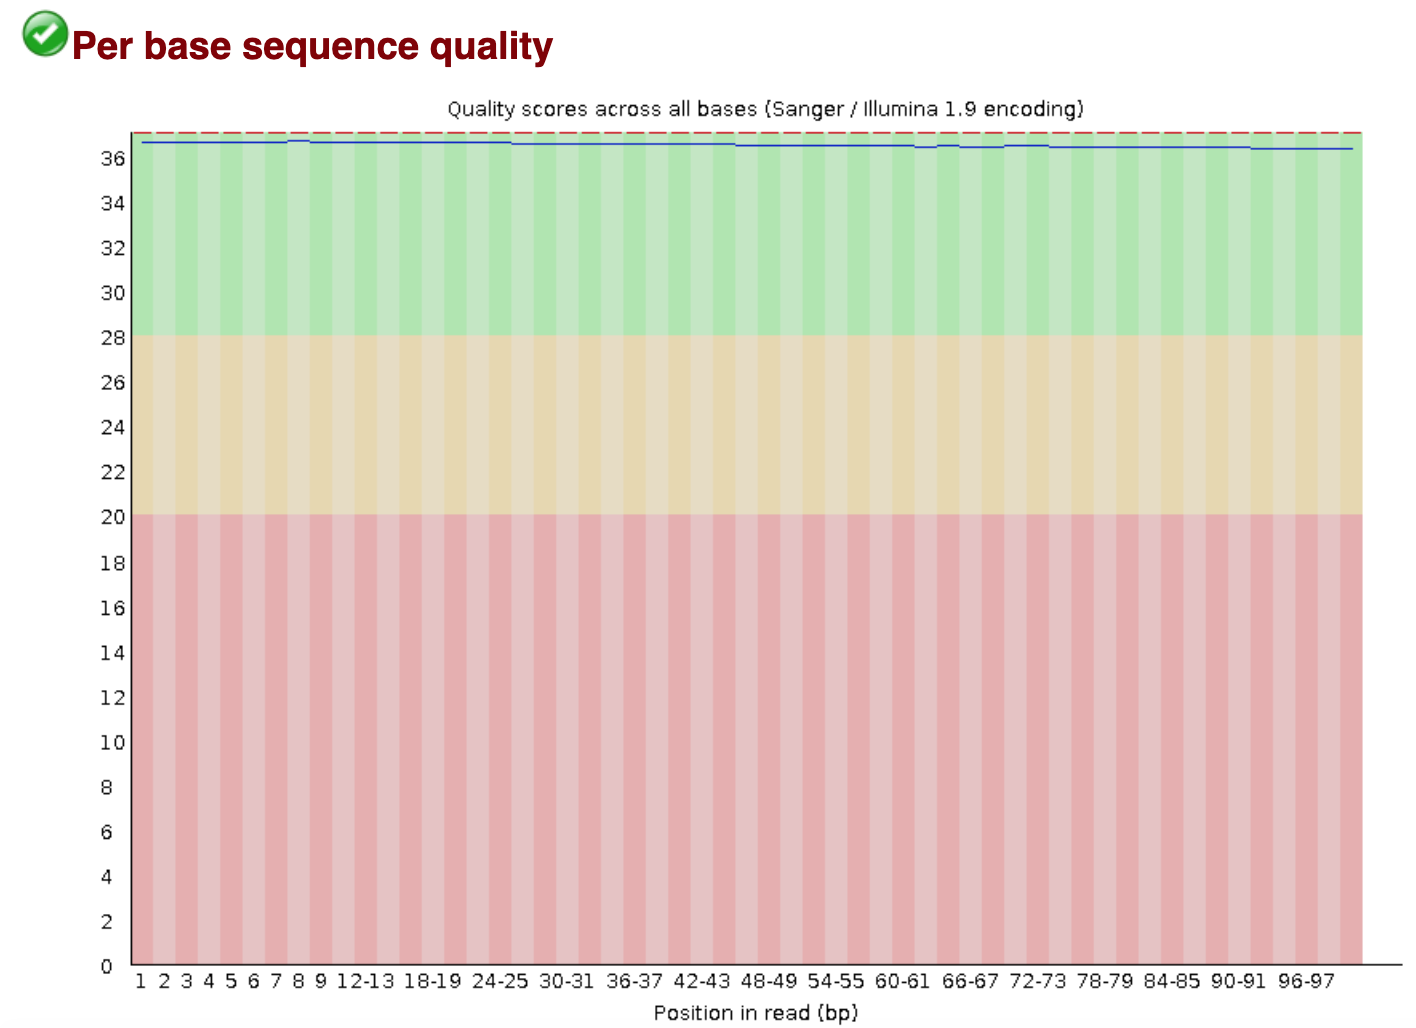

The quality scores were extremely high for all of the fastq data (all four runs had quality score >36 for all bases). They do seem to slightly decrease over time, which I would expect from Illumina data. This seems suspiciously high to me but apparently possible from what I have read online. The number of spots is low for these datasets (from 16M to 19M) so I think this could account in part for the very high scores.  

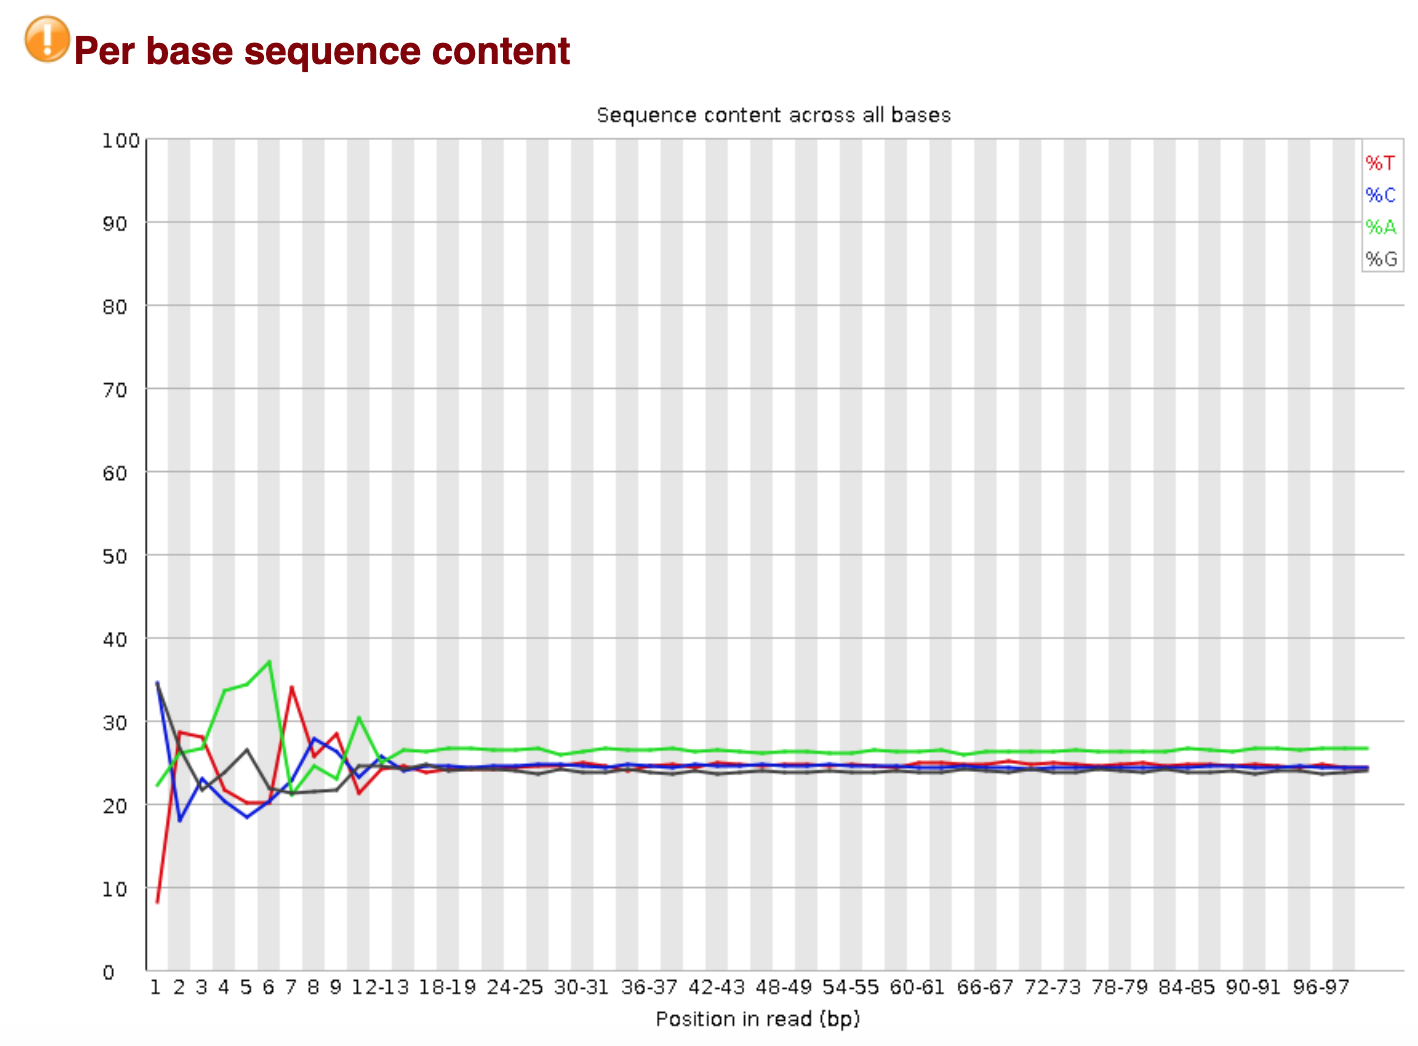

There is the expected enrichment of certain bases at the beginning of the reads, from priming RNAseq data. 

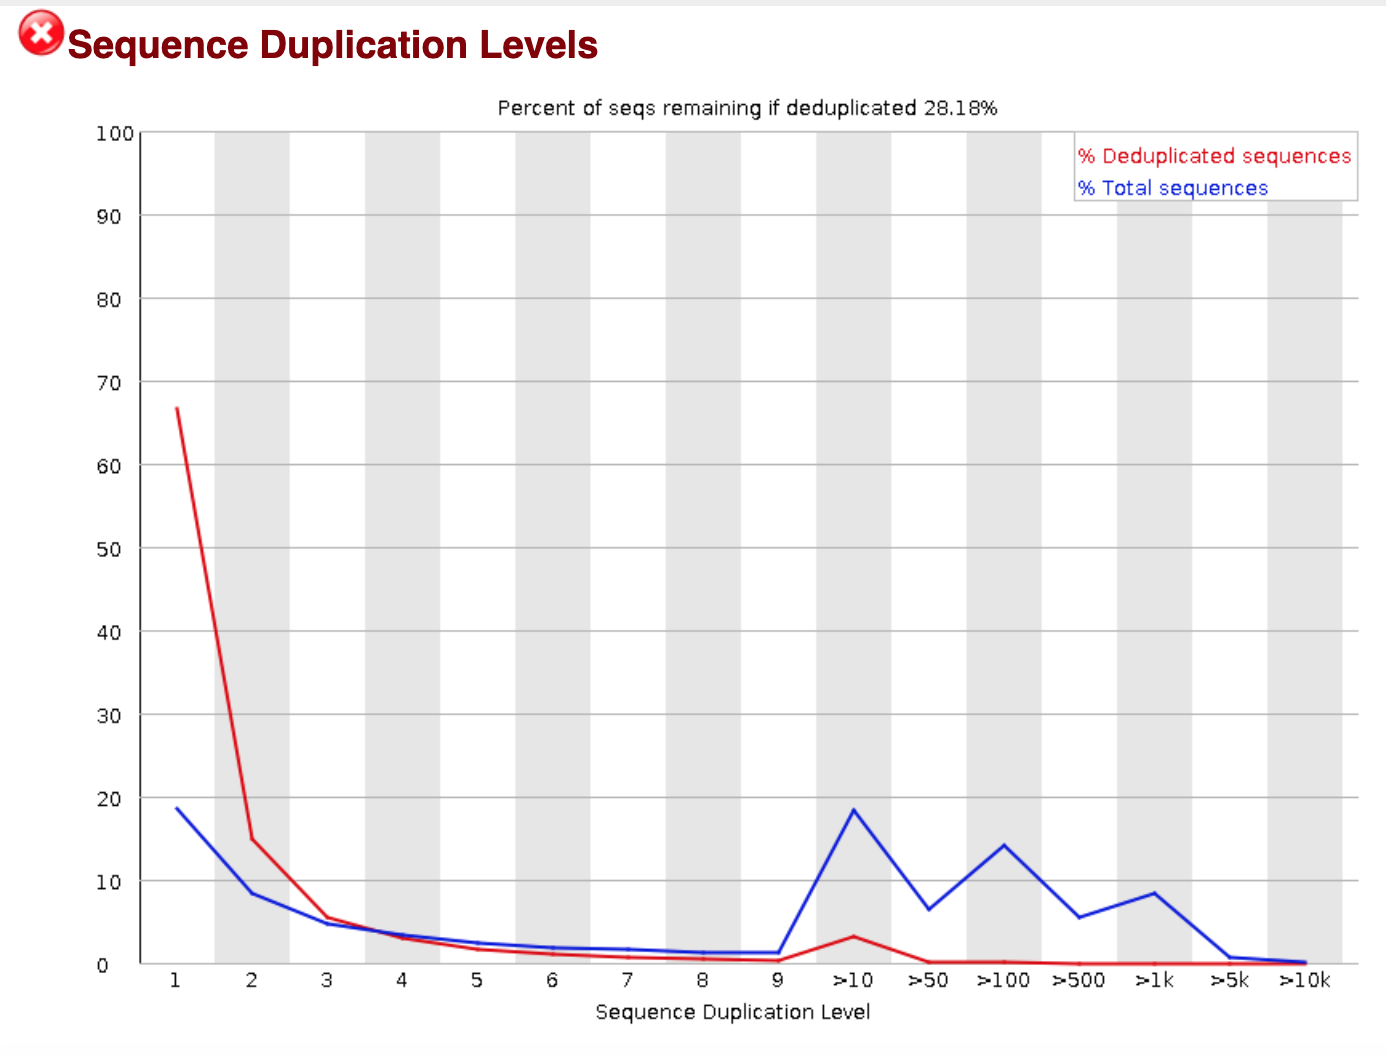

There seems to be a large number of duplicated sequences, which results in a low complexity library. There will be fewer unique reads in the library. This could be caused by using low amounts of RNA sample for sequencing.

In [15]:
/usr/bin/fastqc -o . SRR16958764_1.fastq

Started analysis of SRR16958764_1.fastq
Approx 5% complete for SRR16958764_1.fastq
Approx 10% complete for SRR16958764_1.fastq
Approx 15% complete for SRR16958764_1.fastq
Approx 20% complete for SRR16958764_1.fastq
Approx 25% complete for SRR16958764_1.fastq
Approx 30% complete for SRR16958764_1.fastq
Approx 35% complete for SRR16958764_1.fastq
Approx 40% complete for SRR16958764_1.fastq
Approx 45% complete for SRR16958764_1.fastq
Approx 50% complete for SRR16958764_1.fastq
Approx 55% complete for SRR16958764_1.fastq
Approx 60% complete for SRR16958764_1.fastq
Approx 65% complete for SRR16958764_1.fastq
Approx 70% complete for SRR16958764_1.fastq
Approx 75% complete for SRR16958764_1.fastq
Approx 80% complete for SRR16958764_1.fastq
Approx 85% complete for SRR16958764_1.fastq
Approx 90% complete for SRR16958764_1.fastq
Approx 95% complete for SRR16958764_1.fastq
Analysis complete for SRR16958764_1.fastq


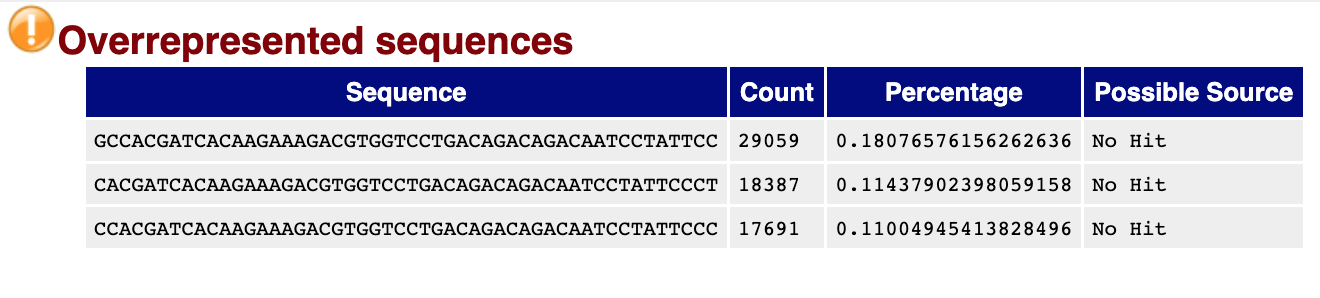

I did a BLAST search on the sequences above -- they match genes encoding Mus musculus major urinary proteins. From a quick google search, these proteins are mainly synthesized in the liver so it makes sense that they would be abundant in these samples. This also points to the fact that the library is not so diverse (with a high number of duplicates).  

In [16]:
/usr/bin/fastqc -o . SRR16958769_1.fastq

Started analysis of SRR16958769_1.fastq
Approx 5% complete for SRR16958769_1.fastq
Approx 10% complete for SRR16958769_1.fastq
Approx 15% complete for SRR16958769_1.fastq
Approx 20% complete for SRR16958769_1.fastq
Approx 25% complete for SRR16958769_1.fastq
Approx 30% complete for SRR16958769_1.fastq
Approx 35% complete for SRR16958769_1.fastq
Approx 40% complete for SRR16958769_1.fastq
Approx 45% complete for SRR16958769_1.fastq
Approx 50% complete for SRR16958769_1.fastq
Approx 55% complete for SRR16958769_1.fastq
Approx 60% complete for SRR16958769_1.fastq
Approx 65% complete for SRR16958769_1.fastq
Approx 70% complete for SRR16958769_1.fastq
Approx 75% complete for SRR16958769_1.fastq
Approx 80% complete for SRR16958769_1.fastq
Approx 85% complete for SRR16958769_1.fastq
Approx 90% complete for SRR16958769_1.fastq
Approx 95% complete for SRR16958769_1.fastq
Analysis complete for SRR16958769_1.fastq


In [17]:
/usr/bin/fastqc -o . SRR16958770_1.fastq

Started analysis of SRR16958770_1.fastq
Approx 5% complete for SRR16958770_1.fastq
Approx 10% complete for SRR16958770_1.fastq
Approx 15% complete for SRR16958770_1.fastq
Approx 20% complete for SRR16958770_1.fastq
Approx 25% complete for SRR16958770_1.fastq
Approx 30% complete for SRR16958770_1.fastq
Approx 35% complete for SRR16958770_1.fastq
Approx 40% complete for SRR16958770_1.fastq
Approx 45% complete for SRR16958770_1.fastq
Approx 50% complete for SRR16958770_1.fastq
Approx 55% complete for SRR16958770_1.fastq
Approx 60% complete for SRR16958770_1.fastq
Approx 65% complete for SRR16958770_1.fastq
Approx 70% complete for SRR16958770_1.fastq
Approx 75% complete for SRR16958770_1.fastq
Approx 80% complete for SRR16958770_1.fastq
Approx 85% complete for SRR16958770_1.fastq
Approx 90% complete for SRR16958770_1.fastq
Approx 95% complete for SRR16958770_1.fastq
Analysis complete for SRR16958770_1.fastq


Based on the sequence quality scores, the raw data looks acceptable to be mapped. The resulting library will likely not be very diverse based on the sequence duplication levels and the overrepresented sequences.  

## Mapping to the mm10 genome using STAR

In [87]:
STAR --genomeDir /mnt/storage/data/resources/genomes/mm10/star/star_mm10_refGene_agat \
    --runThreadN 2 \
    --readFilesIn SRR16958763_1.fastq SRR16958763_2.fastq \
    --outFileNamePrefix ctrl1.
    

Dec 08 14:24:33 ..... started STAR run
Dec 08 14:24:33 ..... loading genome
Dec 08 14:25:33 ..... started mapping
Dec 08 14:37:18 ..... finished successfully


In [88]:
STAR --genomeDir /mnt/storage/data/resources/genomes/mm10/star/star_mm10_refGene_agat \
    --runThreadN 2 \
    --readFilesIn SRR16958764_1.fastq SRR16958764_2.fastq \
    --outFileNamePrefix ctrl2.
    

Dec 08 14:37:18 ..... started STAR run
Dec 08 14:37:18 ..... loading genome
Dec 08 14:38:16 ..... started mapping
Dec 08 14:49:14 ..... finished successfully


In [89]:
STAR --genomeDir /mnt/storage/data/resources/genomes/mm10/star/star_mm10_refGene_agat \
    --runThreadN 2 \
    --readFilesIn SRR16958769_1.fastq SRR16958769_2.fastq \
    --outFileNamePrefix test1.
    

Dec 08 14:49:14 ..... started STAR run
Dec 08 14:49:14 ..... loading genome
Dec 08 14:50:24 ..... started mapping
Dec 08 15:04:41 ..... finished successfully


In [90]:
STAR --genomeDir /mnt/storage/data/resources/genomes/mm10/star/star_mm10_refGene_agat \
    --runThreadN 2 \
    --readFilesIn SRR16958770_1.fastq SRR16958770_2.fastq \
    --outFileNamePrefix test2.
    

Dec 08 15:04:42 ..... started STAR run
Dec 08 15:04:42 ..... loading genome
Dec 08 15:08:53 ..... started mapping
Dec 08 15:22:36 ..... finished successfully


## SAM -> BAM

In [91]:
samtools sort -o ctrl1.bam ctrl1.Aligned.out.sam

[bam_sort_core] merging from 13 files and 1 in-memory blocks...


In [92]:
samtools sort -o ctrl2.bam ctrl2.Aligned.out.sam

[bam_sort_core] merging from 11 files and 1 in-memory blocks...


In [93]:
samtools sort -o test1.bam test1.Aligned.out.sam

[bam_sort_core] merging from 12 files and 1 in-memory blocks...


In [94]:
samtools sort -o test2.bam test2.Aligned.out.sam

[bam_sort_core] merging from 11 files and 1 in-memory blocks...


In [95]:
samtools view ctrl1.bam | head -3 #view a bam file

SRR16958763.1467405	419	chr1	3136720	0	100M	=	3136815	196	GGGGCGTATAAAGTTTGCAAGTCCAATGGGCCTCTCTTTCCAGTGATGGCCGACTAGGCCATCTTTTGATATATATGCAGCTAGAGTCAAGAGCTCCGGG	FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF	NH:i:10	HI:i:3	AS:i:197	nM:i:1
SRR16958763.6320508	419	chr1	3136720	0	100M	=	3136815	196	GGGGCGTATAAAGTTTGCAAGTCCAATGGGCCTCTCTTTCCAGTGATGGCCGACTAGGCCATCTTTTGATATATATGCAGCTAGAGTCAAGAGCTCCGGG	FFFF:FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF:FFFFFFFF	NH:i:10	HI:i:3	AS:i:197	nM:i:1
SRR16958763.1467405	339	chr1	3136815	0	101M	=	3136720	-196	CCGGGGTACTGGTTAGCTCATAATGTTGTTCCACCTATAGGGTTGCAGGTCCCTTTAGCTCCTTGGCTACTTTCTCTAGCTCCTCCATTGGGAGCCCTATG	FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF:FFFFFFFFFFFFFFFFFFFFFFF	NH:i:10	HI:i:3	AS:i:197	nM:i:1
samtools view: writing to standard output failed: Broken pipe
samtools view: error closing standard output: -1


Remove fastq and SAM files to free storage:

In [123]:
rm ctrl1.Aligned.out.sam ctrl2.Aligned.out.sam test1.Aligned.out.sam test2.Aligned.out.sam

In [124]:
rm *.fastq

Make index:

In [97]:
samtools index ctrl1.bam

In [99]:
samtools index ctrl2.bam

In [100]:
samtools index test1.bam

In [101]:
samtools index test2.bam

Check how many reads map to each chromosome:

In [98]:
samtools idxstats ctrl1.bam

chr1	195471971	3568920	0
chr10	130694993	1362448	0
chr11	122082543	2109584	0
chr12	120129022	2751146	0
chr13	120421639	872096	0
chr14	124902244	1117434	0
chr15	104043685	1308892	0
chr16	98207768	982468	0
chr17	94987271	1514504	0
chr18	90702639	883894	0
chr19	61431566	1552652	0
chr1_GL456210_random	169725	116	0
chr1_GL456211_random	241735	224	0
chr1_GL456212_random	153618	206	0
chr1_GL456213_random	39340	218	0
chr1_GL456221_random	206961	300	0
chr2	182113224	2147422	0
chr3	160039680	1782486	0
chr4	156508116	2596754	0
chr4_GL456216_random	66673	482	0
chr4_JH584292_random	14945	0	0
chr4_GL456350_random	227966	460	0
chr4_JH584293_random	207968	642	0
chr4_JH584294_random	191905	920	0
chr4_JH584295_random	1976	48	0
chr5	151834684	4386500	0
chr5_JH584296_random	199368	506	0
chr5_JH584297_random	205776	498	0
chr5_JH584298_random	184189	6	0
chr5_GL456354_random	195993	2	0
chr5_JH584299_random	953012	62	0
chr6	149736546	1882110	0
chr7	145441459	2982014	0
chr7_GL456219_random	175968	4	0
chr8	1294

In [37]:
samtools idxstats ctrl2.bam

chr1	195471971	2793574	0
chr10	130694993	1076950	0
chr11	122082543	1717016	0
chr12	120129022	2391754	0
chr13	120421639	735726	0
chr14	124902244	887842	0
chr15	104043685	1075718	0
chr16	98207768	808248	0
chr17	94987271	1233906	0
chr18	90702639	715044	0
chr19	61431566	1171446	0
chr1_GL456210_random	169725	116	0
chr1_GL456211_random	241735	210	0
chr1_GL456212_random	153618	188	0
chr1_GL456213_random	39340	218	0
chr1_GL456221_random	206961	276	0
chr2	182113224	1759772	0
chr3	160039680	1481240	0
chr4	156508116	2704488	0
chr4_GL456216_random	66673	298	0
chr4_JH584292_random	14945	0	0
chr4_GL456350_random	227966	384	0
chr4_JH584293_random	207968	564	0
chr4_JH584294_random	191905	756	0
chr4_JH584295_random	1976	40	0
chr5	151834684	3340054	0
chr5_JH584296_random	199368	226	0
chr5_JH584297_random	205776	212	0
chr5_JH584298_random	184189	2	0
chr5_GL456354_random	195993	6	0
chr5_JH584299_random	953012	18	0
chr6	149736546	1575242	0
chr7	145441459	2350628	0
chr7_GL456219_random	175968	0	0
chr8	12940

In [38]:
samtools idxstats test1.bam

chr1	195471971	2253498	0
chr10	130694993	1290446	0
chr11	122082543	2139400	0
chr12	120129022	3278622	0
chr13	120421639	816866	0
chr14	124902244	1126774	0
chr15	104043685	1181518	0
chr16	98207768	973422	0
chr17	94987271	1623532	0
chr18	90702639	818384	0
chr19	61431566	1284936	0
chr1_GL456210_random	169725	74	0
chr1_GL456211_random	241735	140	0
chr1_GL456212_random	153618	138	0
chr1_GL456213_random	39340	188	0
chr1_GL456221_random	206961	170	0
chr2	182113224	2001158	0
chr3	160039680	1619716	0
chr4	156508116	3234008	0
chr4_GL456216_random	66673	376	0
chr4_JH584292_random	14945	0	0
chr4_GL456350_random	227966	310	0
chr4_JH584293_random	207968	446	0
chr4_JH584294_random	191905	660	0
chr4_JH584295_random	1976	38	0
chr5	151834684	3290546	0
chr5_JH584296_random	199368	150	0
chr5_JH584297_random	205776	172	0
chr5_JH584298_random	184189	0	0
chr5_GL456354_random	195993	8	0
chr5_JH584299_random	953012	24	0
chr6	149736546	1743380	0
chr7	145441459	3037052	0
chr7_GL456219_random	175968	0	0
chr8	12940

In [39]:
samtools idxstats test2.bam

chr1	195471971	2982978	0
chr10	130694993	1083542	0
chr11	122082543	1711002	0
chr12	120129022	2749198	0
chr13	120421639	738908	0
chr14	124902244	969356	0
chr15	104043685	1091394	0
chr16	98207768	848154	0
chr17	94987271	1263120	0
chr18	90702639	707060	0
chr19	61431566	1221912	0
chr1_GL456210_random	169725	78	0
chr1_GL456211_random	241735	154	0
chr1_GL456212_random	153618	172	0
chr1_GL456213_random	39340	118	0
chr1_GL456221_random	206961	208	0
chr2	182113224	1811630	0
chr3	160039680	1483382	0
chr4	156508116	3237222	0
chr4_GL456216_random	66673	304	0
chr4_JH584292_random	14945	0	0
chr4_GL456350_random	227966	382	0
chr4_JH584293_random	207968	522	0
chr4_JH584294_random	191905	774	0
chr4_JH584295_random	1976	16	0
chr5	151834684	2971002	0
chr5_JH584296_random	199368	222	0
chr5_JH584297_random	205776	208	0
chr5_JH584298_random	184189	2	0
chr5_GL456354_random	195993	2	0
chr5_JH584299_random	953012	42	0
chr6	149736546	1590820	0
chr7	145441459	2280890	0
chr7_GL456219_random	175968	2	0
chr8	129401

Examine bam files in IGV:

I looked at the Obp2a gene first. From the paper this is a gene implicated in hepatic lipid metabolism and it was found to be up-regulated in the test samples. There are more reads mapping to this gene in the test samples than the control samples, so it seems to be up-regulated here as well.

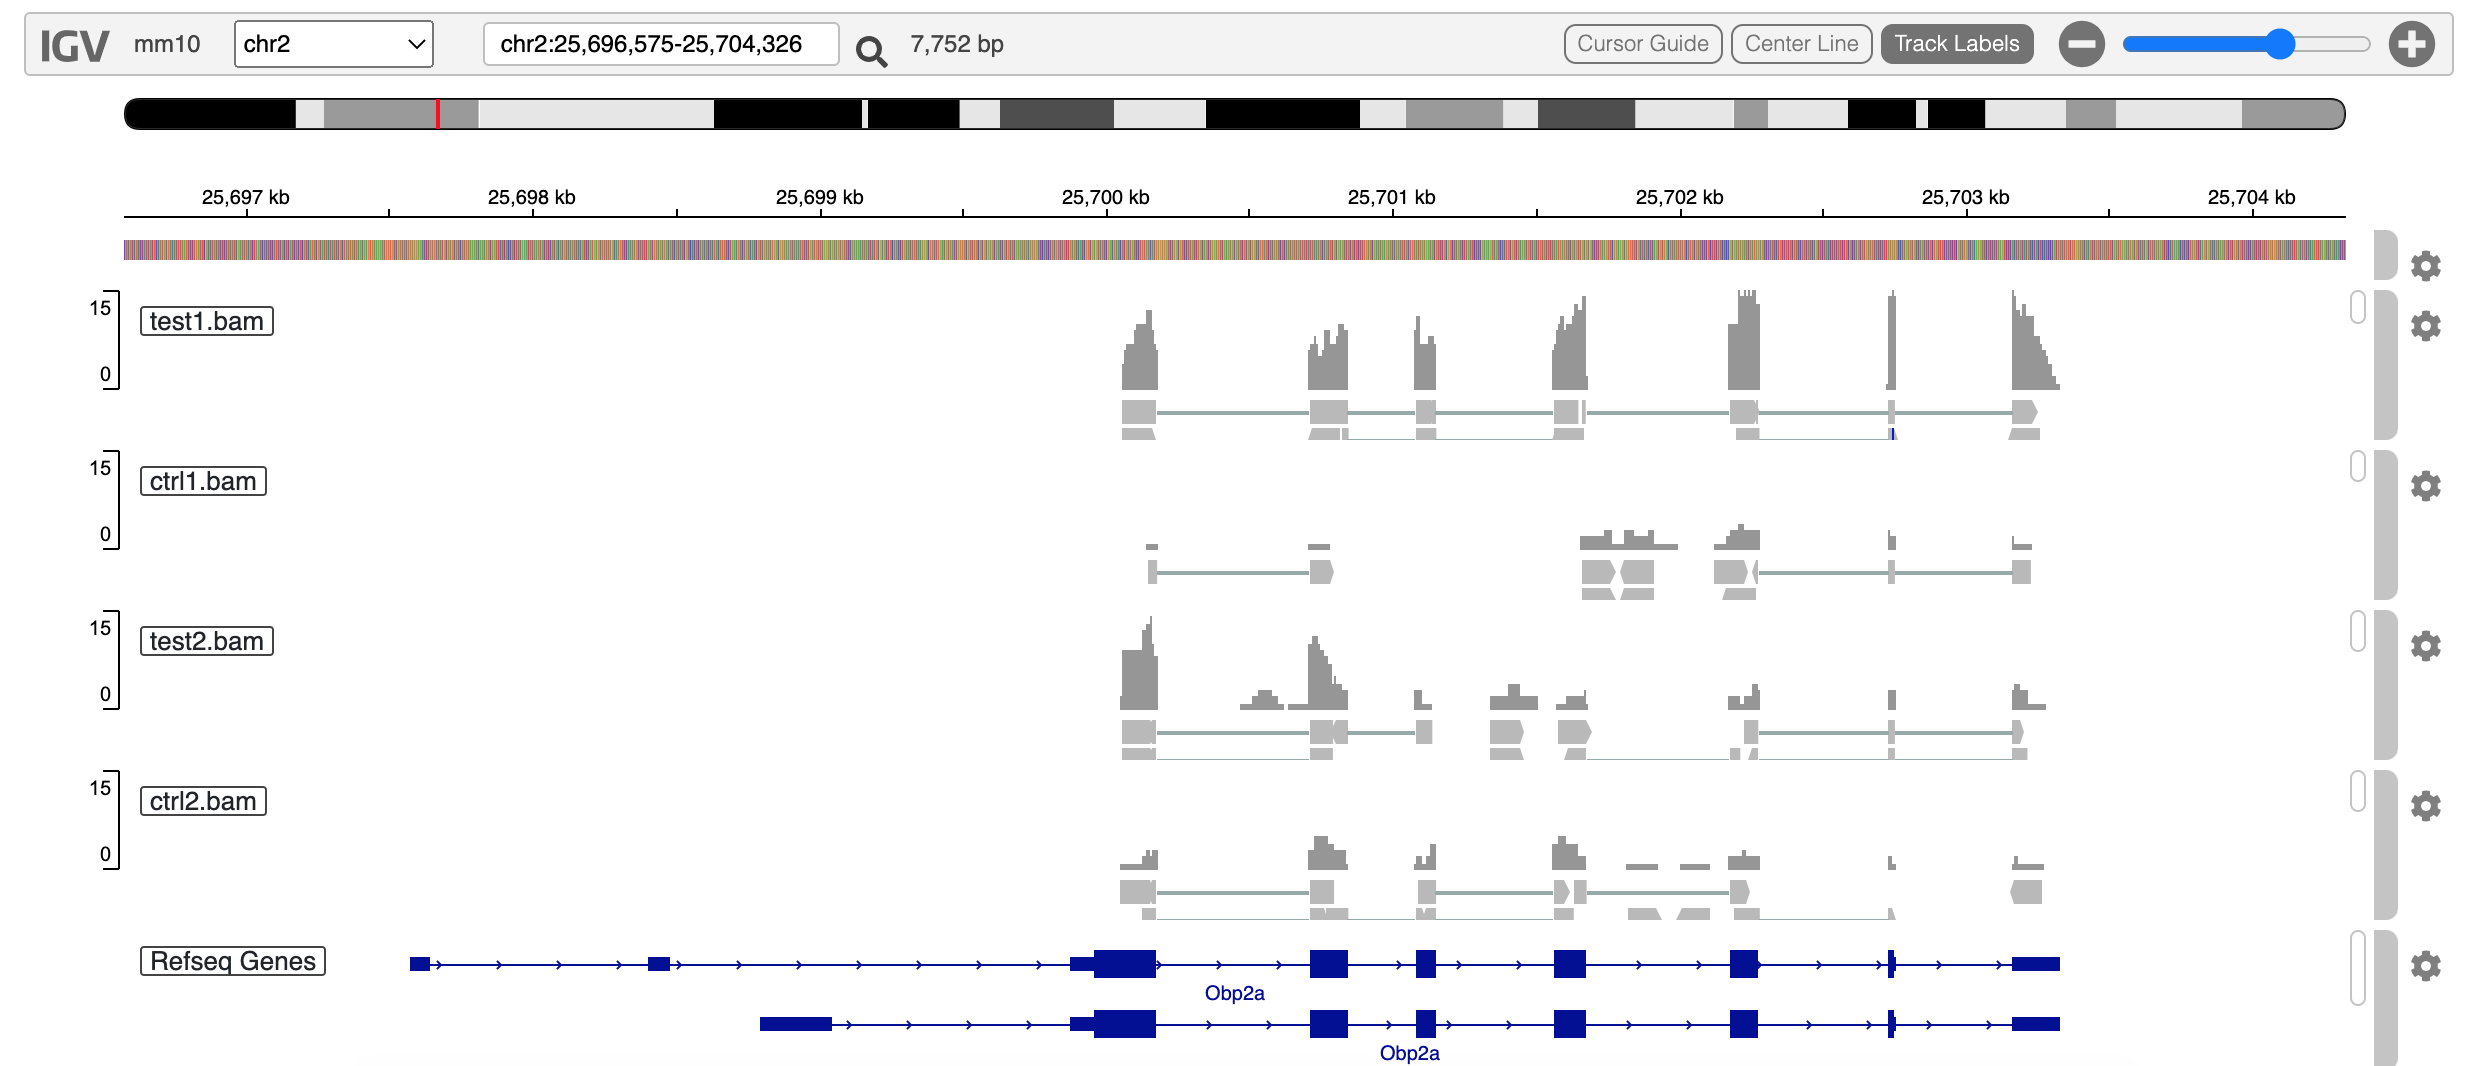

I then looked at a mouse housekeeping gene, Rer1. The gene expression seems somewhat equal among all groups. These counts haven't been normalized yet, which could account for the higher number of counts in test1 and ctrl1.

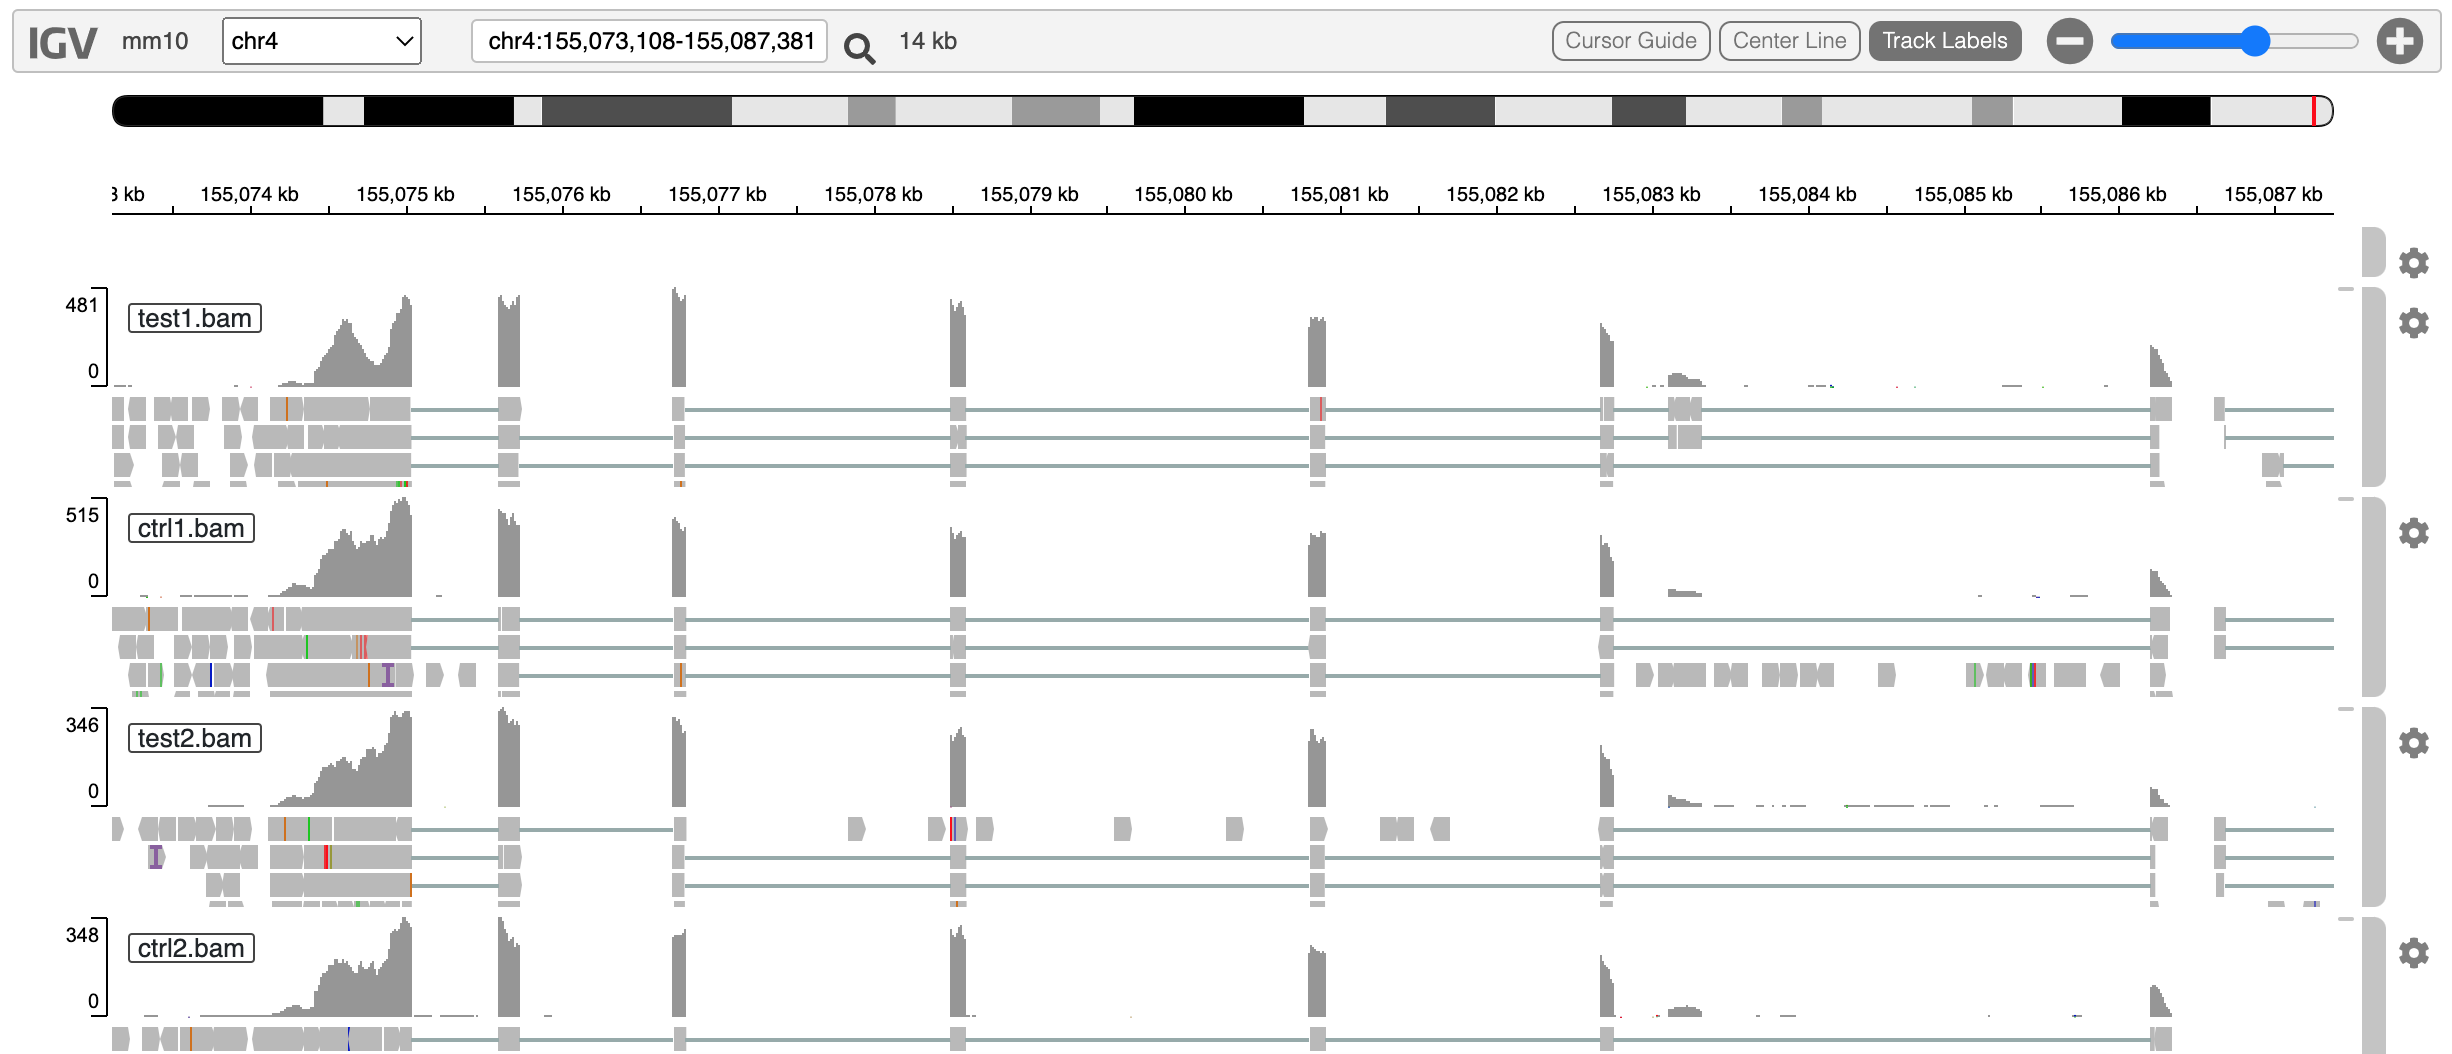

Check mapping flags using flagstat:

In [102]:
samtools flagstat ctrl1.bam

41682550 + 0 in total (QC-passed reads + QC-failed reads)
4122648 + 0 secondary
0 + 0 supplementary
0 + 0 duplicates
41682550 + 0 mapped (100.00% : N/A)
37559902 + 0 paired in sequencing
18779951 + 0 read1
18779951 + 0 read2
37559902 + 0 properly paired (100.00% : N/A)
37559902 + 0 with itself and mate mapped
0 + 0 singletons (0.00% : N/A)
0 + 0 with mate mapped to a different chr
0 + 0 with mate mapped to a different chr (mapQ>=5)


In [40]:
samtools flagstat ctrl2.bam

33910228 + 0 in total (QC-passed reads + QC-failed reads)
3675500 + 0 secondary
0 + 0 supplementary
0 + 0 duplicates
33910228 + 0 mapped (100.00% : N/A)
30234728 + 0 paired in sequencing
15117364 + 0 read1
15117364 + 0 read2
30234728 + 0 properly paired (100.00% : N/A)
30234728 + 0 with itself and mate mapped
0 + 0 singletons (0.00% : N/A)
0 + 0 with mate mapped to a different chr
0 + 0 with mate mapped to a different chr (mapQ>=5)


In [41]:
samtools flagstat test1.bam

37235106 + 0 in total (QC-passed reads + QC-failed reads)
3539292 + 0 secondary
0 + 0 supplementary
0 + 0 duplicates
37235106 + 0 mapped (100.00% : N/A)
33695814 + 0 paired in sequencing
16847907 + 0 read1
16847907 + 0 read2
33695814 + 0 properly paired (100.00% : N/A)
33695814 + 0 with itself and mate mapped
0 + 0 singletons (0.00% : N/A)
0 + 0 with mate mapped to a different chr
0 + 0 with mate mapped to a different chr (mapQ>=5)


In [42]:
samtools flagstat test2.bam

35140998 + 0 in total (QC-passed reads + QC-failed reads)
4152004 + 0 secondary
0 + 0 supplementary
0 + 0 duplicates
35140998 + 0 mapped (100.00% : N/A)
30988994 + 0 paired in sequencing
15494497 + 0 read1
15494497 + 0 read2
30988994 + 0 properly paired (100.00% : N/A)
30988994 + 0 with itself and mate mapped
0 + 0 singletons (0.00% : N/A)
0 + 0 with mate mapped to a different chr
0 + 0 with mate mapped to a different chr (mapQ>=5)


The mapping looks good -- all reads passed QC and 100% of the reads were mapped. There is the same number of forward and reverse reads in each file and each pair is paired properly with its mates (no singletons or read pairs mapped to different chromosomes).

## Reads to gene counts

In [103]:
ln -sf /mnt/storage/data/resources/genomes/mm10/mm10.refGene.agat.gtf .

In [104]:
head mm10.refGene.agat.gtf #make sure the file looks as expected, that it has 9 columns etc

##gtf-version 3
chr5_GL456354_random	refGene	gene	5185	9462	.	+	.	gene_id "A430089I19Rik"; transcript_id "NM_177913"; ID "A430089I19Rik"; gene_name "A430089I19Rik";
chr5_GL456354_random	refGene	transcript	5185	9462	.	+	.	gene_id "A430089I19Rik"; transcript_id "NM_177913"; ID "NM_177913"; Parent "A430089I19Rik"; gene_name "A430089I19Rik";
chr5_GL456354_random	refGene	exon	5185	5258	.	+	.	gene_id "A430089I19Rik"; transcript_id "NM_177913"; ID "NM_177913.1"; Parent "NM_177913"; exon_id "NM_177913.1"; exon_number "1"; gene_name "A430089I19Rik";
chr5_GL456354_random	refGene	exon	6339	6652	.	+	.	gene_id "A430089I19Rik"; transcript_id "NM_177913"; ID "NM_177913.2"; Parent "NM_177913"; exon_id "NM_177913.2"; exon_number "2"; gene_name "A430089I19Rik";
chr5_GL456354_random	refGene	exon	7107	7697	.	+	.	gene_id "A430089I19Rik"; transcript_id "NM_177913"; ID "NM_177913.3"; Parent "NM_177913"; exon_id "NM_177913.3"; exon_number "3"; gene_name "A430089I19Rik";
chr5_GL456354_random	refGene	exon	8594	

In [109]:
featureCounts -Q 10 -g gene_name -a mm10.refGene.agat.gtf -o all.counts ctrl1.bam ctrl2.bam test1.bam test2.bam 
#only map reads with mapping score >10


        ==========     _____ _    _ ____  _____  ______          _____  
        =====         / ____| |  | |  _ \|  __ \|  ____|   /\   |  __ \ 
          =====      | (___ | |  | | |_) | |__) | |__     /  \  | |  | |
            ====      \___ \| |  | |  _ <|  _  /|  __|   / /\ \ | |  | |
              ====    ____) | |__| | |_) | | \ \| |____ / ____ \| |__| |
        ==========   |_____/ \____/|____/|_|  \_\______/_/    \_\_____/
	  v1.6.0

//========================== featureCounts setting ===========================\\
||                                                                            ||
||             Input files : 4 BAM files                                      ||
||                           P ctrl1.bam                                      ||
||                           P ctrl2.bam                                      ||
||                           P test1.bam                                      ||
||                           P test2.bam                         

In [122]:
cat all.counts.summary

Status	ctrl1.bam	ctrl2.bam	test1.bam	test2.bam
Assigned	30123686	24037095	28132788	23994070
Unassigned_Unmapped	0	0	0	0
Unassigned_MappingQuality	6988006	6083248	5542658	6830150
Unassigned_Chimera	0	0	0	0
Unassigned_FragmentLength	0	0	0	0
Unassigned_Duplicate	0	0	0	0
Unassigned_MultiMapping	0	0	0	0
Unassigned_Secondary	0	0	0	0
Unassigned_Nonjunction	0	0	0	0
Unassigned_NoFeatures	4082219	3397857	3028836	3897113
Unassigned_Overlapping_Length	0	0	0	0
Unassigned_Ambiguity	488639	392028	530824	419665


In [110]:
head all.counts 

# Program:featureCounts v1.6.0; Command:"featureCounts" "-Q" "10" "-g" "gene_name" "-a" "mm10.refGene.agat.gtf" "-o" "all.counts" "ctrl1.bam" "ctrl2.bam" "test1.bam" "test2.bam" 
Geneid	Chr	Start	End	Strand	Length	ctrl1.bam	ctrl2.bam	test1.bam	test2.bam
A430089I19Rik	chr5_GL456354_random;chr5_GL456354_random;chr5_GL456354_random;chr5_GL456354_random;chr5_JH584298_random;chr5_JH584298_random;chr5_JH584298_random;chr5_JH584298_random;chr5_JH584298_random;chr5;chr5;chr5;chr5;chr5;chr5;chr5;chr5;chr5	5185;6339;7107;8594;167742;169506;169617;170552;171946;94302519;94304284;94305329;94306723;94951011;94952775;94952886;94953821;94955215	5258;6652;7697;9462;168610;169615;170097;170865;172019;94303387;94304874;94305642;94306796;94951879;94952884;94953366;94954134;94955288	+;+;+;+;-;-;-;-;-;-;-;-;-;-;-;-;-;-	7392	0	0	0	0
Gm29089	chrY;chrY;chrY;chrY;chrY;chrY	206150;207227;207472;321658;322155;323077	206369;207292;207789;321975;322220;323296	+;+;+;-;-;-	1208	0	0	0	0
1700020D14Rik	chrY;chrY;chrY;c

Make an all.gene.counts file with gene name and counts only:

In [111]:
cut -f1,7- all.counts | grep -v '^#' > all.gene.counts

In [112]:
wc -l all.gene.counts #total number of genes (+1 for header)

25240 all.gene.counts


In [113]:
head all.gene.counts

Geneid	ctrl1.bam	ctrl2.bam	test1.bam	test2.bam
A430089I19Rik	0	0	0	0
Gm29089	0	0	0	0
1700020D14Rik	0	0	0	0
Zfy1	0	0	0	0
Uba1y	0	0	0	0
Kdm5d	480	365	438	370
Eif2s3y	1616	1340	1089	1693
Tspy-ps	0	0	0	0
Uty	408	283	121	415


Checking a few known genes:

In [114]:
grep Obp2a all.gene.counts #controls are first 2, then test samples

Obp2a	8	16	66	30


These are raw counts from the sequencing data so they still need to normalize before formally analyzing. But as a quick check, I looked at Opb2a gene again, which I know should be up-regulated in the test samples from the paper. It looks like it is up-regulated.
Next I looked at two housekepeing genes in mice. These look somewhat stable.

In [115]:
grep Rer1 all.gene.counts #look at housekeeping gene, it is relatively stable

Rer1	3854	2696	3460	2583


In [116]:
grep Rpl13a all.gene.counts #another housekeeping gene in mice

Rpl13a	8526	6271	10484	6342
